In [68]:
coeffs = []

def compute_coeff(X,f,iteration):
  new_f = []
  coeffs.append(f[0])
  for i in range(len(X)-iteration):
    value = (f[i] - f[i+1]) / (X[i] - X[i+iteration])
    new_f.append(value)
  # coeffs.append(new_f[0])
  if (len(new_f) > 1):
    compute_coeff(X,new_f,iteration+1)
  else:
    coeffs.append(new_f[0])

def polynomial_f(points,coeffs,x):
  product = 1
  value = coeffs[0]
  i=0
  for coeff in coeffs[1:]:
    product = product * (x - points[i])
    value += product * coeff
    i+=1
  return value

x = [0,1,3,4,6]
f = [1,-2,-1,0,2]
compute_coeff(x,f,1)
display(coeffs)
polynomial_f(x,coeffs,4)



[1, -3.0, 1.1666666666666667, -0.25, 0.036111111111111115]

0.0

In [56]:
coeffs = []
x = [1999+5*i for i in range(5)]
f = [72.8,74.2, 75.2, 76.4, 76.8]
compute_coeff(x,f,1)
polynomial_f(x,coeffs,2000)

73.19456

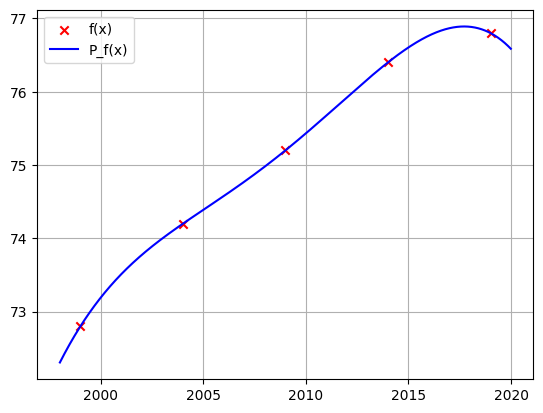

In [58]:
import matplotlib.pyplot as plt
import numpy as np

interval = np.arange(x[0]-1,x[-1]+1,0.01)

plt.scatter(x,f,marker="x",color="red",label="f(x)")
plt.plot(interval,[polynomial_f(x,coeffs,i) for i in interval],color="blue",label="P_f(x)")
plt.legend()
plt.grid()
plt.show()


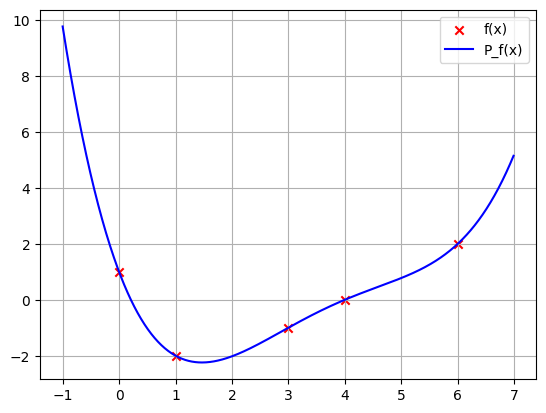

<__main__.Interpolation object at 0x79f75e40ed20> 1


[1, -3.0, 1.1666666666666667, -0.25, 0.036111111111111115]

In [87]:
import matplotlib.pyplot as plt
import numpy as np

class Interpolation:
  def __init__(self,points:list[int],f:list[int]):
    self.points = points
    self.f = f
    self.coeffs = []
    self.compute_coeff(self.points,self.f,1)

  def get_coeffs(self):
    return self.coeffs

  def change_points(self,new_points:list[int],new_f:list[int]):
    self.points = new_points
    self.f = new_f
    self.coeffs = []
    self.compute_coeff(self.points,self.f,1)

  def add_points(self,new_points:list[int],new_f:list[int]):
    self.points.extend(new_points)
    self.f.extend(new_f)
    self.coeffs = []
    self.compute_coeff(self.points,self.f,1)

  def compute_coeff(self,X,f,iteration):
    new_f = []
    self.coeffs.append(f[0])
    for i in range(len(X)-iteration):
      value = (f[i] - f[i+1]) / (X[i] - X[i+iteration])
      new_f.append(value)
    if (len(new_f) > 1):
      self.compute_coeff(X,new_f,iteration+1)
    else:
      self.coeffs.append(new_f[0])

  def polynomial_f(self,x):
    product = 1
    value = self.coeffs[0]
    for i in range(len(self.coeffs)-1):
      product = product * (x - self.points[i])
      value += product * self.coeffs[i+1]
    return value

  def plot_point_polynomial(self):
    interval = np.arange(self.points[0]-1,self.points[-1]+1,0.01)
    plt.scatter(self.points,self.f,marker="x",color="red",label="f(x)")
    plt.plot(interval,[self.polynomial_f(i) for i in interval],color="blue",label="P_f(x)")
    plt.legend()
    plt.grid()
    plt.show()

test1 = Interpolation([0,1,3,4,6],[1,-2,-1,0,2])
test1.plot_point_polynomial()
test1.get_coeffs()


In [120]:
class InterpolationV2(Interpolation):
  """same as interpolation calss but it stores all the coeffs when calculating the polynomial,
    so when adding new points it wont have to compute all the coeffs again
  """

  def __init__(self,points:list[int],f:list[int]):
    self.points = points
    self.f = f.copy() # normalement we dont need it
    self.coeffs = [self.f[0]]
    self.all_coeffs = [f.copy()]
    self.compute_coeff()

  def add_points(self,new_points:list[int],new_f:list[int]):
    for pt in range(len(new_points)):

      self.points.append(new_points[pt])
      self.f.append(new_f[pt])

      self.all_coeffs[0].append(new_f[pt])

      for i in range(len(self.points)-2):
        value = (self.all_coeffs[i][-2] - self.all_coeffs[i][-1]) / (self.points[-2-i] - self.points[-1])
        self.all_coeffs[i+1].append(value)
        self.coeffs.append(value)

      value = (self.all_coeffs[i][-2] - self.all_coeffs[i][-1]) / (self.points[-2-i] - self.points[-1])
      self.all_coeffs.append([value])


  def add_point(self,new_points:int,new_f:int):
      self.points.append(new_points)
      self.f.append(new_f)
      self.all_coeffs[0].append(new_f)

      for i in range(len(self.points)-2):
        value = (self.all_coeffs[i][-2] - self.all_coeffs[i][-1]) / (self.points[-2-i] - self.points[-1])
        self.all_coeffs[i+1].append(value)
        self.coeffs.append(value)

      value = (self.all_coeffs[i][-2] - self.all_coeffs[i][-1]) / (self.points[-2-i] - self.points[-1])
      self.all_coeffs.append([value])

  def compute_coeff(self):
    print(self.all_coeffs,self.points)
    for iter in range(len(self.points)-1):
      new_f = []
      for i in range(len(self.points)-iter-1):
        value = (self.all_coeffs[-1][i] - self.all_coeffs[-1][i+1])/(self.points[i] - self.points[i+iter+1])
        new_f.append(value)
      self.all_coeffs.append(new_f)
      self.coeffs.append(new_f[0])

  def plot_point_polynomial(self):
    interval = np.arange(self.points[0]-1,self.points[-1]+1,0.01)
    plt.scatter(self.points,self.f,marker="x",color="red",label="f(x)")
    plt.plot(interval,[self.polynomial_f(i) for i in interval],color="blue",label="P_f(x)")
    plt.legend()
    plt.grid()
    plt.show()

test1 = InterpolationV2([0,1,3,4],[1,-2,-1,0])
test1.add_point(6,2)
# display(test1.get_coeffs())
# test1.plot_point_polynomial()

[[1, -2, -1, 0]] [0, 1, 3, 4]


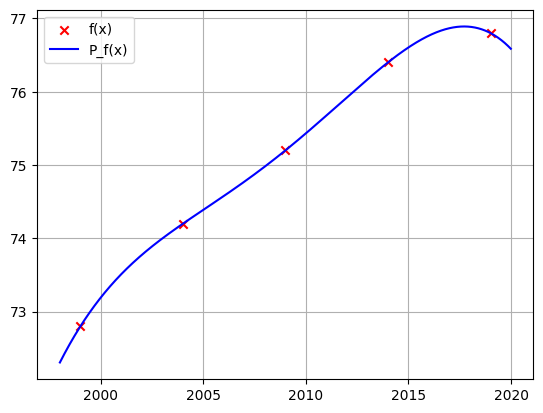

<__main__.Interpolation object at 0x79f75e5dd460> 1


[72.8,
 0.28000000000000114,
 -0.008000000000000113,
 0.0008000000000000113,
 -0.00010666666666666818]

In [95]:
x = [1999+5*i for i in range(5)]
f = [72.8,74.2, 75.2, 76.4, 76.8]
test1 = Interpolation(x,f)
test1.plot_point_polynomial()
test1.get_coeffs()